In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Tweets

In [31]:
tweets = pd.read_csv('tweets.csv')

In [32]:
tweets.head()

,source,text,created_at,retweet_count,favorite_count
0,Twitter for iPhone,I will be announcing my Second Term Presidenti...,05-31-2019 20:35:41,35248,128039
1,Twitter Media Studio,GREAT NEWS! #MAGA https://t.co/91Yk8B11bP,05-31-2019 20:02:16,20493,75339
2,Twitter for iPhone,As we celebrate LGBT Pride Month and recognize...,05-31-2019 19:12:32,28936,136614
3,Twitter for iPhone,....on the basis of their sexual orientation. ...,05-31-2019 19:12:32,20416,105421
4,Twitter for iPhone,.@SeanHannity is having a DEEP STATE SHOW toni...,05-31-2019 18:11:25,18257,65602


In [33]:
tweets['time'] = pd.to_datetime(tweets['created_at'])

In [34]:
tweets.head()

,source,text,created_at,retweet_count,favorite_count,time
0,Twitter for iPhone,I will be announcing my Second Term Presidenti...,05-31-2019 20:35:41,35248,128039,2019-05-31 20:35:41
1,Twitter Media Studio,GREAT NEWS! #MAGA https://t.co/91Yk8B11bP,05-31-2019 20:02:16,20493,75339,2019-05-31 20:02:16
2,Twitter for iPhone,As we celebrate LGBT Pride Month and recognize...,05-31-2019 19:12:32,28936,136614,2019-05-31 19:12:32
3,Twitter for iPhone,....on the basis of their sexual orientation. ...,05-31-2019 19:12:32,20416,105421,2019-05-31 19:12:32
4,Twitter for iPhone,.@SeanHannity is having a DEEP STATE SHOW toni...,05-31-2019 18:11:25,18257,65602,2019-05-31 18:11:25


In [35]:
tweets['time'].max()

Timestamp('2019-05-31 20:35:41')

In [36]:
tweets['time'].min()

Timestamp('2017-01-02 14:40:10')

In [37]:
len(tweets)

6596

In [38]:
tweets['date'] = tweets['time'].dt.date

## Load S&P 500

In [10]:
sp500 = pd.read_csv('sp500.csv')

In [11]:
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000


In [12]:
len(sp500)

606

In [13]:
sp500['date'] = pd.to_datetime(sp500['Date']).dt.date

In [14]:
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date
0,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000,2017-01-03
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000,2017-01-04
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000,2017-01-05
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000,2017-01-06
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000,2017-01-09


In [15]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 8 columns):
Date         606 non-null object
Open         606 non-null float64
High         606 non-null float64
Low          606 non-null float64
Close        606 non-null float64
Adj Close    606 non-null float64
Volume       606 non-null int64
date         606 non-null object
dtypes: float64(5), int64(1), object(2)
memory usage: 38.0+ KB


In [16]:
sp500['date'].max()

datetime.date(2019, 5, 31)

In [17]:
sp500['date'].min()

datetime.date(2017, 1, 3)

In [18]:
sp500['diff'] = sp500['Close'] - sp500['Open']

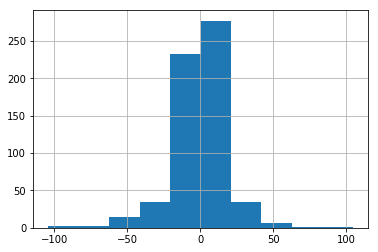

In [19]:
sp500['diff'].hist()

## Generate label (Increase or not)

In [20]:
sp500['label'] = sp500['diff'] > 0

In [22]:
sp500['label'] = sp500['label'].apply(int)

In [39]:
sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date,diff,label
0,2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3770530000,2017-01-03,6.260010,1
1,2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3764890000,2017-01-04,9.149902,1
2,2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3761820000,2017-01-05,0.820068,1
3,2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3339890000,2017-01-06,5.840087,1
4,2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3217610000,2017-01-09,-4.690186,0


## Combine tweets and labels

In [41]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6596 entries, 0 to 6595
Data columns (total 7 columns):
source            6596 non-null object
text              6596 non-null object
created_at        6596 non-null object
retweet_count     6596 non-null int64
favorite_count    6596 non-null int64
time              6596 non-null datetime64[ns]
date              6596 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 360.8+ KB


In [42]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 10 columns):
Date         606 non-null object
Open         606 non-null float64
High         606 non-null float64
Low          606 non-null float64
Close        606 non-null float64
Adj Close    606 non-null float64
Volume       606 non-null int64
date         606 non-null object
diff         606 non-null float64
label        606 non-null int64
dtypes: float64(6), int64(2), object(2)
memory usage: 47.4+ KB


In [43]:
data = pd.merge(tweets, sp500, on='date')

In [44]:
data.head()

,source,text,created_at,retweet_count,favorite_count,time,date,Date,Open,High,Low,Close,Adj Close,Volume,diff,label
0,Twitter for iPhone,I will be announcing my Second Term Presidenti...,05-31-2019 20:35:41,35248,128039,2019-05-31 20:35:41,2019-05-31,2019-05-31,2766.149902,2768.97998,2750.52002,2752.060059,2752.060059,3981020000,-14.089843,0
1,Twitter Media Studio,GREAT NEWS! #MAGA https://t.co/91Yk8B11bP,05-31-2019 20:02:16,20493,75339,2019-05-31 20:02:16,2019-05-31,2019-05-31,2766.149902,2768.97998,2750.52002,2752.060059,2752.060059,3981020000,-14.089843,0
2,Twitter for iPhone,As we celebrate LGBT Pride Month and recognize...,05-31-2019 19:12:32,28936,136614,2019-05-31 19:12:32,2019-05-31,2019-05-31,2766.149902,2768.97998,2750.52002,2752.060059,2752.060059,3981020000,-14.089843,0
3,Twitter for iPhone,....on the basis of their sexual orientation. ...,05-31-2019 19:12:32,20416,105421,2019-05-31 19:12:32,2019-05-31,2019-05-31,2766.149902,2768.97998,2750.52002,2752.060059,2752.060059,3981020000,-14.089843,0
4,Twitter for iPhone,.@SeanHannity is having a DEEP STATE SHOW toni...,05-31-2019 18:11:25,18257,65602,2019-05-31 18:11:25,2019-05-31,2019-05-31,2766.149902,2768.97998,2750.52002,2752.060059,2752.060059,3981020000,-14.089843,0


In [45]:
data.to_csv('data.csv', index=False)